<a href="https://colab.research.google.com/github/Sumitkevlani/End-to-End-ML-projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [2]:
gold_dataset = pd.read_csv('gold_price_data.csv')

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
gold_dataset.shape

(2290, 6)

In [6]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Axes: >

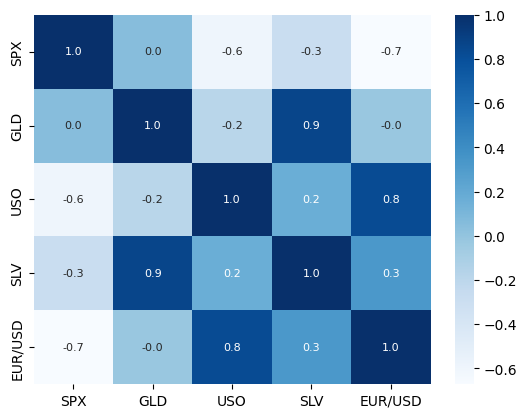

In [10]:
#finding the correlation matrix for the data
gold_dataset_numeric = gold_dataset.drop('Date',axis=1)
correlation = gold_dataset_numeric.corr()
sns.heatmap(correlation,cbar=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [11]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<ipython-input-15-ab3235c2eae1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

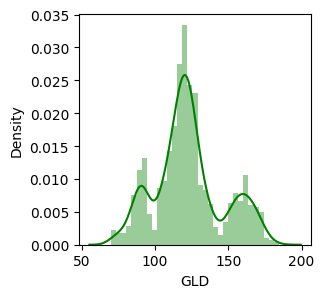

In [15]:
#checking the distribution of the gold price
plt.figure(figsize=(3,3))
sns.distplot(gold_dataset['GLD'],color='green')

In [18]:
X = gold_dataset.drop(['GLD','Date'],axis=1)
Y = gold_dataset['GLD']
print(X,Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [20]:
#training the model
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [23]:
X_train_predict = model.predict(X_train)

#printing r squared error and mean absolute error
rsquare_error = metrics.r2_score(X_train_predict,Y_train)
print('R square error:',rsquare_error)
mean_abs_error = metrics.mean_absolute_error(X_train_predict,Y_train)
print('Mean absolute error:',mean_abs_error)

R square error: 0.9985852402691955
Mean absolute error: 0.4603649045269249


In [24]:
X_test_predict = model.predict(X_test)

#printing r squared error and mean absolute error
rsquare_error = metrics.r2_score(X_test_predict,Y_test)
print('R square error:',rsquare_error)
mean_abs_error = metrics.mean_absolute_error(X_test_predict,Y_test)
print('Mean absolute error:',mean_abs_error)

R square error: 0.9889351287492124
Mean absolute error: 1.2797198329257573


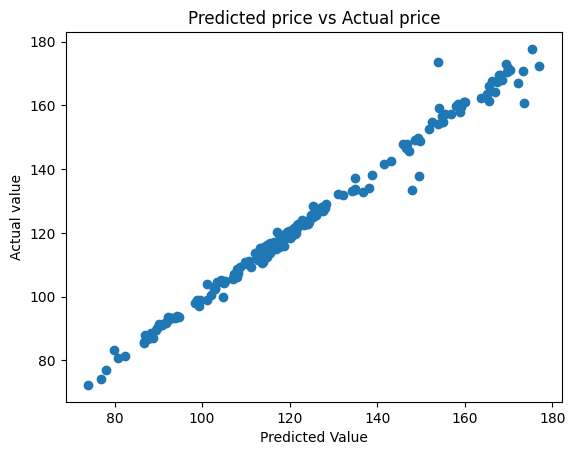

In [25]:
plt.scatter(X_test_predict,Y_test)
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')
plt.title('Predicted price vs Actual price')
plt.show()

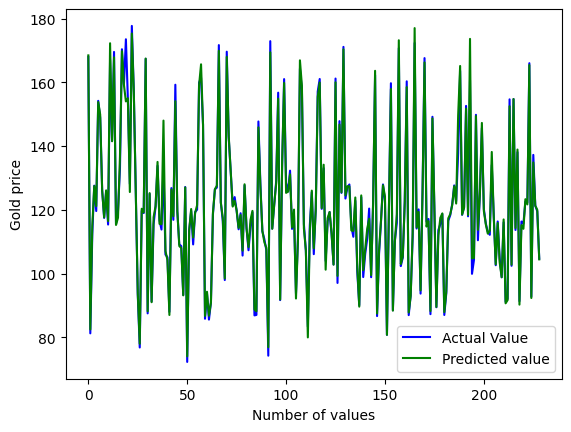

In [26]:
Y_test = list(Y_test)
X_test_predict = list(X_test_predict)
plt.plot(Y_test,color='Blue',label='Actual Value')
plt.plot(X_test_predict,color='Green',label='Predicted value')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()